In [35]:
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading the Dataset

In [2]:
x_train = np.loadtxt('input.csv', delimiter = ',')
y_train = np.loadtxt('labels.csv', delimiter = ',')
x_test = np.loadtxt('input_test.csv', delimiter = ',')
y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape) 

Shape of x_train: (2000, 30000)
Shape of y_train: (2000,)
Shape of x_test: (400, 30000)
Shape of y_test: (400,)


In [4]:
#100*100*3, 100*100 pixel each for RGB
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

#normalize (minmax)
x_train = x_train/255.0
x_test = x_test/255.0

print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (2000, 100, 100, 3)
Shape of y_train: (2000, 1)
Shape of x_test: (400, 100, 100, 3)
Shape of y_test: (400, 1)


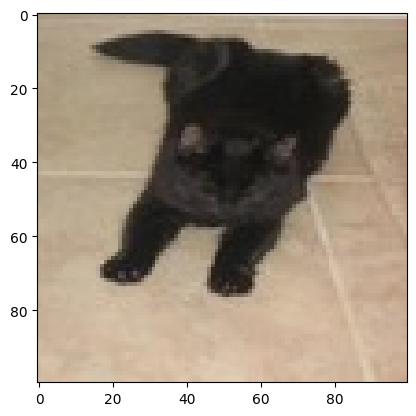

In [5]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

# Model

In [40]:
model2 = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid') 
])

In [41]:
#way 2
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [38]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8115 - loss: 0.4137
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8525 - loss: 0.3452
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8835 - loss: 0.2873
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9210 - loss: 0.2034
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9445 - loss: 0.1516


In [10]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6175 - loss: 0.6885


[0.6884841918945312, 0.6175000071525574]

# Making Predictions

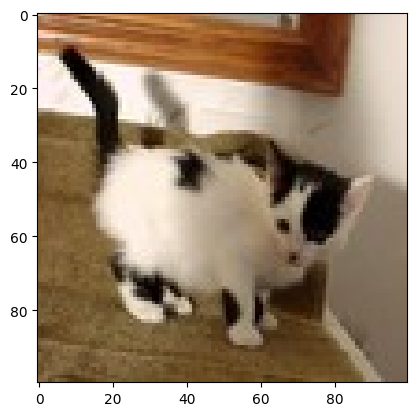

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0.5101343]], dtype=float32)

In [44]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()

y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
y_pred

In [45]:
y_pred = y_pred > 0.5

if (y_pred == 1):
    pred = 'dog'
else: 
    pred = 'cat'

print('Our model says its a', pred)

Our model says its a dog
